## Неделя 2. Вторник

### Numpy. Часть 2

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris # pip install scikit-learn
from sklearn.decomposition import TruncatedSVD, PCA
__great__ = 'Все круто!'

### 1.PCA

* Ниже приведен датасетзависимости роста и веса человека. 

In [154]:
df = pd.read_csv('aux/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


__1.1__ Постройте scatterplot данной зависимости

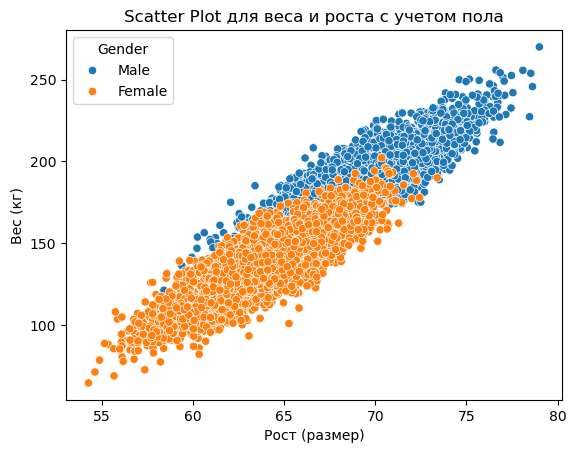

In [155]:
sns.scatterplot(data=df, x='Height', y='Weight', hue='Gender')

plt.xlabel("Рост (размер)")
plt.ylabel("Вес (кг)")
plt.title("Scatter Plot для веса и роста с учетом пола")
plt.show()

* Ответьте на вопрос, есть ли линейная зависимость данных(коллинеарность)

> Да, это коллинеарный вектор 

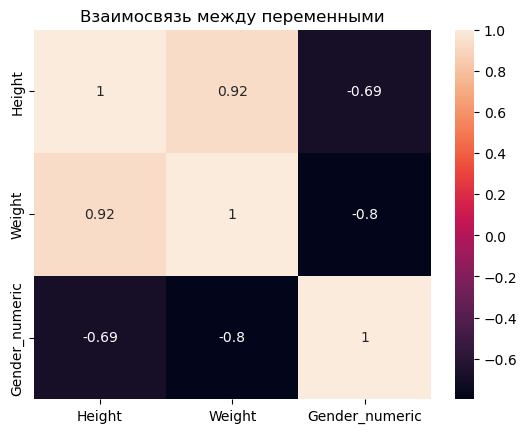

In [156]:
# Избавляемся от категориальных признаков
df['Gender_numeric'] = df['Gender'].map({"Male": 0, "Female": 1})

# Строим тепловую карту для определения мультиколлинеарности
sns.heatmap(df[['Height', 'Weight', 'Gender_numeric']].corr(),annot=True)
plt.title('Взаимосвязь между переменными')
plt.show()

__1.2__ Сделайте понижение размерности с помощью [pca](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)(principal component analysis)

In [157]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Стандартизируем данные
norm_df = ss.fit_transform(df[['Height', 'Weight', 'Gender_numeric']])

# Понижаем размерность до двух для более точной работы с полом
pca = PCA(n_components=2)
pca.fit_transform(norm_df)
df_pca = pca.transform(norm_df)

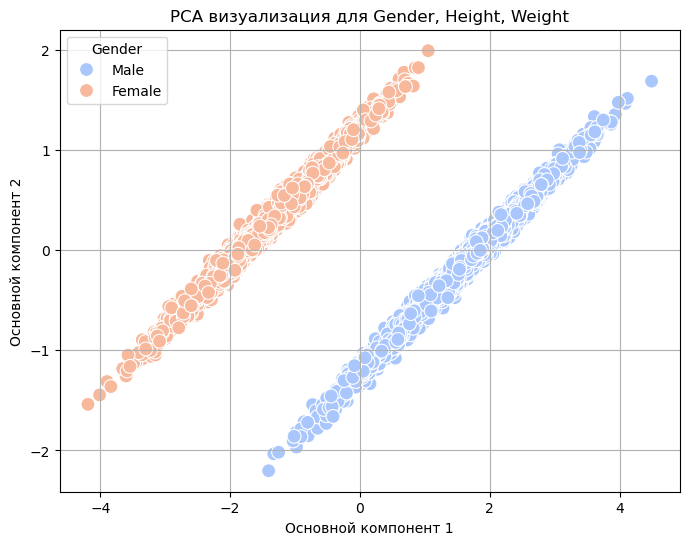

In [158]:
df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

# Визуализация результатов PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Gender', data=df, s=100, palette='coolwarm')
plt.title('PCA визуализация для Gender, Height, Weight')
plt.xlabel('Основной компонент 1')
plt.ylabel('Основной компонент 2')
plt.grid(True)
plt.show()

__1.3__ Отобразите, сколько процентов информации вы при этом сохранили

In [163]:
explain_var = pca.explained_variance_ratio_
total_explain_var = explain_var.sum() * 100
print(f"Сколько информации объясняет каждый компонент: {round(explain_var[0] * 100, 2)}% и {round(explain_var[1] * 100, 2)}%\nСколько всего сохранилось информации: {round(total_explain_var, 2)}%")

Сколько информации объясняет каждый компонент: 87.07% и 10.95%
Сколько всего сохранилось информации: 98.03%


__1.4.__ Удовлетворителен ли результат?

> Да, хотя и доля второго компонента равна 11%, но зато сохраняется 98% информации против 87% при одном компоненте

__1.5__ Попробуйте подгрузить свой обработанный датасет с проектом по циан. И проверить его на мультиколлинеарность с помощью _pca_.

In [181]:
path = '/home/oldmovielover/ds_bootcamp/Streamlit_group_project/realises/Streamlit_data.csv'
df_streamlit = pd.read_csv(path)

norm_df_streamlit = ss.fit_transform(df_streamlit)
pca = PCA()
pca.fit(norm_df_streamlit)

PCA()

Количество компонентов, объясняющих 90% дисперсии: 21


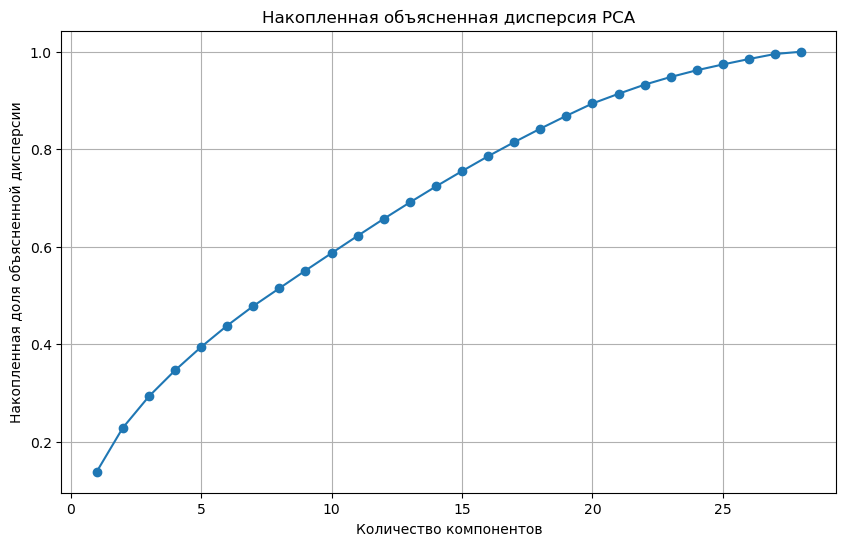

In [225]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
num_components = sum(cumulative_variance < 0.9) + 1
print(f"Количество компонентов, объясняющих 90% дисперсии: {num_components}")

# Построим график накопленной дисперсии
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Количество компонентов')
plt.ylabel('Накопленная доля объясненной дисперсии')
plt.title('Накопленная объясненная дисперсия PCA')
plt.grid(True)
plt.show()

> Похоже на то, что в данном датасете отсутствуюет мультиколлинеарность. Скорее всего каждый признак добавляет свою уникальную информацию  

### 2.SVD

2.1 Для тех, кто уже сделал все. Можно попробовать ощутить прелесть SVD в Изображениях :)
1. Выберите любую черно-белую картинку
2. Подгрузите ее в питон.
3. Посмотрите, какого у вас размера матрица изображения
4. Отобразите изображение в питоне
5. Разложите матрицу по SVD, как в нашем примере из лекции сегодня
6. Выберите топ k сингулярных чисел и схлопните матрицу обратно
7. Посмотрите результат
8. Выберите минимальный k при котором картинка еще все так же различима
9. Какую долю этот k составляет от всех сингулярных чисел
10. Обернуть в стримлит-приложение, с интерфейсом, в котором пользователь может подгрузить свою картинку и выбрать ко-во сингулярных чисел. В ответ получить сжатый вариант

In [21]:
from skimage import io
url = 'https://spbprinter.ru/wp-content/uploads/2020/06/-5'
image = io.imread(url)[:,:, 1]


In [22]:
image.shape

(400, 800)

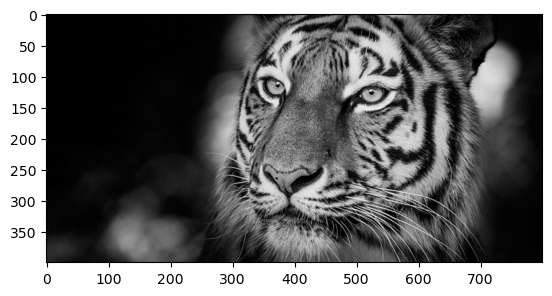

In [23]:
plt.imshow(image, cmap='grey')

In [24]:
U, sing_vals, V = np.linalg.svd(image)

In [26]:
sigma = np.zeros(shape = image.shape)
np.fill_diagonal(sigma, sing_vals)

In [30]:
U.shape, sigma.shape, V.shape

((400, 400), (400, 800), (800, 800))

In [55]:
top_k = 400
print(f'Cохранил {100 * top_k / len(sing_vals)}%')

Cохранил 100.0%


In [49]:
trunc_U = U[:, :top_k]
trunc_sigma = sigma[:top_k, :top_k]
trunc_V = V[:top_k, :]

In [50]:
trunc_U.shape, trunc_sigma.shape, trunc_V.shape

((400, 400), (400, 800), (800, 800))

Text(0.5, 1.0, 'top_k = 1500 компонент')

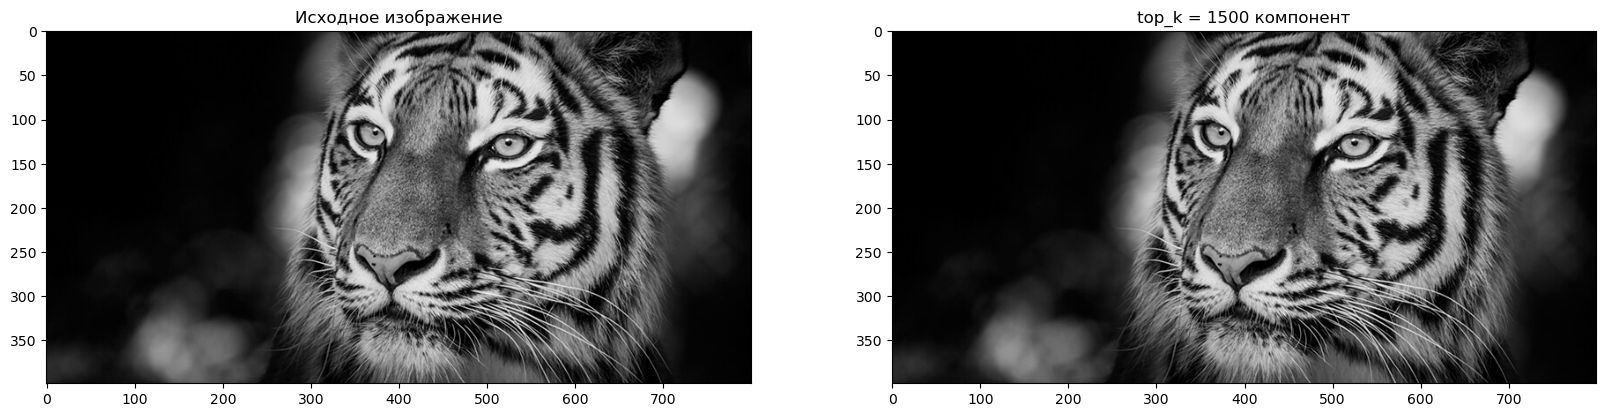

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))
axes[0].imshow(U@sigma@V, cmap='grey')
axes[0].set_title('Исходное изображение')
axes[1].imshow(trunc_U@trunc_sigma@trunc_V, cmap='grey')
axes[1].set_title(f'top_k = {top_k} компонент')

#### 3. Продолжение закрепления NumPy

__3.1__ Создайте массив из 20 нулей и замените 0-е, 5-е, 10-е, 15-е значения на 999

In [ ]:
res = np.array([999., 0., 0., 0., 0., 
                999., 0., 0., 0., 0., 
                999., 0., 0., 0., 0., 
                999., 0., 0., 0., 0.])

# ваш код:
zeros = None

In [ ]:
# проверка должна выдать True и тогда print выдаст своё сообщение
assert np.allclose(zeros, res)
print(__great__)

__3.2__ Посчитайте минимум и максимум по строкам

In [ ]:
x = np.arange(4).reshape((2, 2))

In [ ]:
# ваш код
# представьте результат для максимума с сохранением исходной размерности массива
x_min = None
x_max = None

In [ ]:
# проверка

assert np.allclose(x_min, np.array([0, 2]))
assert np.allclose(x_max, np.array([[1], [3]])) 

print(__great__)

❓Посмотрите на результат выполнения функции `np.allclose` в 0 и 1 заданиях. Что она делает?

> ответ тут

__3.3__ Посчитайте 75-й перцентиль по строкам.

In [ ]:
x = np.arange(1, 11).reshape((2, 5))

# ваш код
print(x)

percentile_75 = None

In [ ]:
# проверка

assert np.allclose(percentile_75, np.array([4., 9.]))

print(__great__)

__3.4__ Посчитайте двумя способами среднее взвешенное

In [3]:
x = np.arange(5)
weights = np.arange(1, 6) # веса

In [ ]:
print(x)

# ваш код
res1 = 0
res2 = 1

assert np.allclose(res1, res2)
print(__great__)

__3.5__ Найдите среднее, стандартное отклонение (среднеквадратическое отклонение) и дисперсию

In [ ]:
x = np.arange(1, 7)
print(x)

In [ ]:
# ваш код
# посчитайте двумя способами каждое значение

out1 = None
out2 = None
assert np.allclose(out1, out2)
print("mean=\n", out1)

out3 = None
out4 = None
assert np.allclose(out3, out4)
print("std=\n", out3)

out5 = None
out6 = None
assert np.allclose(out5, out6)
print("variance=\n", out5)

print(__great__)

__3.6__ Создайте новый массив из исходного, путем повторения

In [ ]:
x = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9]]) 


res = np.array([[1, 2, 3, 1, 2, 3, 1, 2, 3],
                [4, 5, 6, 4, 5, 6, 4, 5, 6],
                [7, 8, 9, 7, 8, 9, 7, 8, 9]])

In [ ]:
# ваш код
x3 = None

In [ ]:
assert np.allclose(x3, res)
print(__great__)

__3.7__ Создайте из массива новый numpy массив уникальных значений и индексов

Дан numpy массив (*оригинальный*) с несколькими повторяющимися значениями элементов. Нужно создать **новый** массив, который содержит только уникальные значения. А также массив индексов **нового** массива, который позволит воссоздать *оригинальный*.

In [ ]:
x = np.array([1, 2, 6, 4, 2, 3, 2])

In [ ]:
# пример ответов
unique_elements = np.array([1, 2, 3, 4, 6])
reconstruction_indices = np.array([0, 1, 4, 3, 1, 2, 1])

# ваш код

# ...
# unique_elements = 
# reconstruction_indices = 


assert np.allclose(unique_elements[reconstruction_indices], x)
print(__great__)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Пора сохранить изменения для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "numpy tasks in progress"`
4. Выполни команду `git push`

Выполни в ячейке ниже команду `!git status`

__3.8__ Найдите "разницу" между двумя массивами

In [ ]:
x = np.array([0, 1, 2, 5, 0])
y = np.array([0, 1, 4])

In [ ]:
res = np.array([2, 5])
out = # ваш код

assert np.allclose(res, out)
print(__great__)

__3.10__ Найдите разницу между каждым следующим элементом массива и предыдущм

In [ ]:
x = np.array([1, 2, 4, 7, 0])
diff = np.array([1, 2, 3, -7]) # 2-1, 4-2, 7-3, 0-7

In [ ]:
# ваш код
out = 0

assert np.allclose(diff, out)
print(__great__)

<img src="https://icons.iconarchive.com/icons/icons8/windows-8/256/Programming-Github-icon.png" width=32 /> Сохрани файл для __github__. 

1. Перейди в командной строке в папку, в которой расположен этот нотбук. 
2. Выполни команду `git add .`
3. Выполни команду `git commit -m "numpy2 tasks completed"`
4. Выполни команду `git push`